In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json      # library for working with JSON-formatted text strings
import pprint as pp    # library for cleanly printing Python data structures
import seaborn as sns

This is a basic test for https://github.com/taspinar/twitterscraper. Using the demo data looking at all tweets re. Trump. 

twitterscraper "climate change from:metrolosangeles" --lang en -o cc_test.JSON -l 100

In [3]:
#this loads the data into json in the notebook

with open('cc_test.JSON') as f:
 data1 = json.load(f)

print(type(data1))

<class 'list'>


print(data[:500])

pp.pprint(data)




#wordcloud





In [94]:
#for x in data:
  # print(x['text'])

In [4]:
d = {'username': [x['username'] for x in data1],
    'time': [x['timestamp'] for x in data1],
    'tweet': [x['text'] for x in data1],
    'likes': [x['likes'] for x in data1],
    'replies': [x['replies'] for x in data1]
    }

df = pd.DataFrame.from_dict(d)
df


,username,time,tweet,likes,replies
0,LA Metro,2014-04-01T18:32:47,TranspoNews: should Metro charge for parking a...,0,2
1,LA Metro,2014-04-01T18:32:47,TranspoNews: should Metro charge for parking a...,0,2
2,LA Metro,2012-10-24T17:51:30,"Transpo headlines: climate change non-issue, d...",0,0
3,LA Metro,2012-10-24T17:51:30,"Transpo headlines: climate change non-issue, d...",0,0
4,LA Metro,2017-12-13T23:15:15,How We Roll: the future of Metrolink's Claremo...,4,1
...,...,...,...,...,...
58,LA Metro,2020-01-22T18:32:35,Metro News Now: tackling climate change via tr...,42,9
59,LA Metro,2019-09-11T02:15:03,If you saw “Ice on Fire” tonight by @LeoDiCapr...,52,7
60,LA Metro,2019-08-01T17:20:15,Climate change is one of the biggest issues we...,14,0
61,LA Metro,2019-07-29T17:20:12,Leading the way for a greener LA — here’s how ...,32,1


In [31]:
#going to try to create a single function to do this 

def json_to_df_tweets (csv_file):
    with open(csv_file) as f:
      data = json.load(f)
    
    d = {'username': [x['username'] for x in data],
        'time': [x['timestamp'] for x in data],
        'tweet': [x['text'] for x in data],
        'likes': [x['likes'] for x in data],
        'replies': [x['replies'] for x in data]
        }
    
    df_Test = pd.DataFrame.from_dict(d)
    
    return df_Test

In [32]:
# Twitter data that states "climate change"; the scraper loads in requests by user
la_metro_tweets = json_to_df_tweets ('cc_test.JSON')
lacity_tweets = json_to_df_tweets ('lacity_tweets.json')
ladot_tweets = json_to_df_tweets('ladot_tweets.json')
laplanning_tweets = json_to_df_tweets('laplanning_tweets.json')
laport_tweets = json_to_df_tweets('laport_tweets.json')

Using the function above "json_to_df_tweets" - we'll load all of the LA City tweets with the words "climate change" so that we can merge them together in one large df. 

lacity_tweets.json /
lacountyparks_tweets.json /
ladot_tweets.json /
laplanning_tweets.json /
laport_tweets.json

In [27]:
def combine_dataframe (df1, df2, df3, df4, df5, df6): #this function smooshes all the dataframes into one using .append()
    d1 = df1.append(df2)
    d2 = d1.append(df3)
    d3 = d2.append(df4)
    d4 = d3.append(df5)
    d5 = d4.append(df6)
    return d5.drop_duplicates(subset='tweet', keep="first") #the scraper picked up dups, this rectifies that

In [28]:
la_tweets = combine_dataframe(ladot_tweets, la_metro_tweets, lacity_tweets, la_parks_tweets, laplanning_tweets, laport_tweets)
la_tweets

,username,time,tweet,likes,replies
0,LADOT,2019-10-10T00:00:31,Today @MayorOfLA Eric Garcetti was elected @c4...,33,5
2,LADOT,2019-04-29T19:01:08,Excited our @ladottransit is on track to be ze...,20,2
0,LA Metro,2014-04-01T18:32:47,TranspoNews: should Metro charge for parking a...,0,2
2,LA Metro,2012-10-24T17:51:30,"Transpo headlines: climate change non-issue, d...",0,0
4,LA Metro,2017-12-13T23:15:15,How We Roll: the future of Metrolink's Claremo...,4,1
...,...,...,...,...,...
8,Los Angeles City Planning,2020-03-02T20:28:31,There were 129% more affordable housing units ...,8,0
9,Los Angeles City Planning,2020-02-13T02:08:18,We are grateful for city planners who help lea...,8,1
10,Los Angeles City Planning,2019-08-07T18:32:55,The draft Downtown Community Plan promotes a m...,6,0
11,Los Angeles City Planning,2019-07-30T17:39:15,#HappeningNow: @LACity Council voted unanimous...,72,2


We have all the tweets from LA city agencies that mention climate change. 

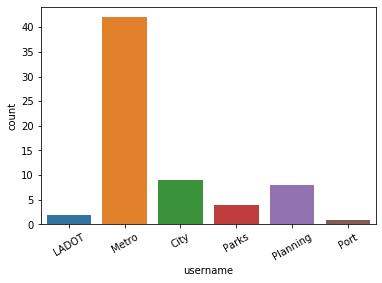

In [43]:
ax = sns.countplot(x='username', data=la_tweets)
ax.set_xticklabels(labels=['LADOT', 'Metro', 'City', 'Parks', 'Planning', 'Port'], rotation=30)
plt.show()

In [49]:
la_tweets.sort_values(by= 'time', ascending=True)
#test = sns.tsplot(data=la_tweets, time="time", unit="username", value="likes")

,username,time,tweet,likes,replies
10,LA Metro,2011-08-10T16:43:16,"Headlines: cyclist hit twice by same motorist,...",1,0
29,LA Metro,2011-12-22T19:36:45,"Gas prices fall again, big oil spill in Nigeri...",0,0
28,LA Metro,2012-01-09T18:47:24,Today's headlines: Gov. Brown and high-speed r...,0,0
27,LA Metro,2012-01-23T18:06:21,"Candidates on climate change, new courthouse n...",0,0
2,LA Metro,2012-10-24T17:51:30,"Transpo headlines: climate change non-issue, d...",0,0
...,...,...,...,...,...
2,City of Los Angeles,2019-11-05T23:13:28,Learn more about how we're working to fight #C...,5,0
0,Port of Los Angeles,2019-11-21T23:26:30,Topic is how tariffs are hurting consumers and...,0,0
53,LA Metro,2020-01-22T18:32:35,Metro News Now: tackling climate change via tr...,42,9
9,Los Angeles City Planning,2020-02-13T02:08:18,We are grateful for city planners who help lea...,8,1


In [52]:
from datetime import datetime


In [53]:
datetime.strptime('2018-09-11T15::11::45.456777', '%Y-%m-%dT%H::%M::%S.%f')
 

datetime.datetime(2018, 9, 11, 15, 11, 45, 456777)

In [62]:
for x in la_tweets['time']:
    print (datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")) #'%Y-%m-%dT%H::%M::%S.%f'))



2019-10-10 00:00:31
2019-04-29 19:01:08
2014-04-01 18:32:47
2012-10-24 17:51:30
2017-12-13 23:15:15
2017-08-02 15:41:48
2017-06-05 04:10:05
2017-06-03 15:15:18
2017-06-03 05:30:16
2017-06-01 20:16:01
2011-08-10 16:43:16
2016-04-22 19:30:17
2013-11-05 17:15:22
2013-10-04 16:18:21
2013-09-11 22:03:20
2013-08-12 18:14:31
2013-05-28 17:37:40
2013-05-22 17:22:14
2013-04-17 21:54:17
2015-03-30 19:00:15
2014-10-06 15:34:18
2014-09-26 20:12:40
2012-01-23 18:06:21
2012-01-09 18:47:24
2011-12-22 19:36:45
2019-04-19 02:00:35
2019-04-11 21:45:15
2017-01-25 20:42:50
2017-01-18 16:56:18
2016-12-07 07:30:17
2016-11-21 21:00:30
2016-11-01 21:42:35
2016-11-01 21:11:30
2016-11-01 16:37:12
2016-11-01 07:15:09
2015-11-10 09:00:13
2015-11-07 03:30:06
2015-10-27 18:00:09
2015-04-29 19:13:14
2020-01-22 18:32:35
2019-09-11 02:15:03
2019-08-01 17:20:15
2019-07-29 17:20:12
2019-07-26 19:20:07
2019-03-15 22:41:31
2019-11-05 23:13:28
2019-09-05 19:57:02
2018-08-27 21:35:22
2018-06-15 21:24:14
2018-01-24 20:51:27
